# Exploratory Data Analysis
For Dataset of StackOverflow developer survey 2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../data/survey_results_public.csv')

## Initial look at data inside the survey

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"Basic information about the survey:")
print(f" - Number of questions: {df.shape[1]}")
print(f" - Number of answers: {df.shape[0]}")


Basic information about the survey:
 - Number of questions: 154
 - Number of answers: 51392


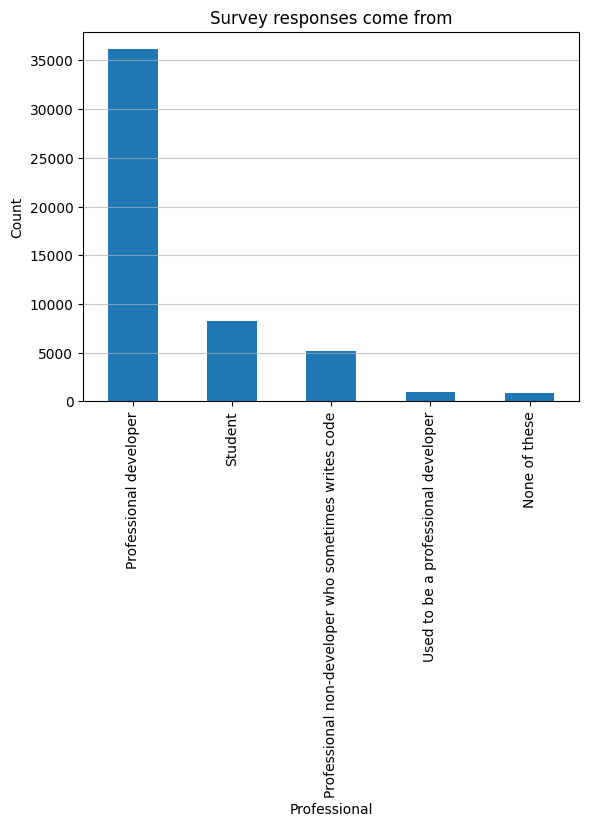

In [5]:
top_responders_profession = df['Professional'].value_counts()
top_responders_profession.plot(kind='bar')

plt.title('Survey responses come from')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

There are responses from 201 countries.


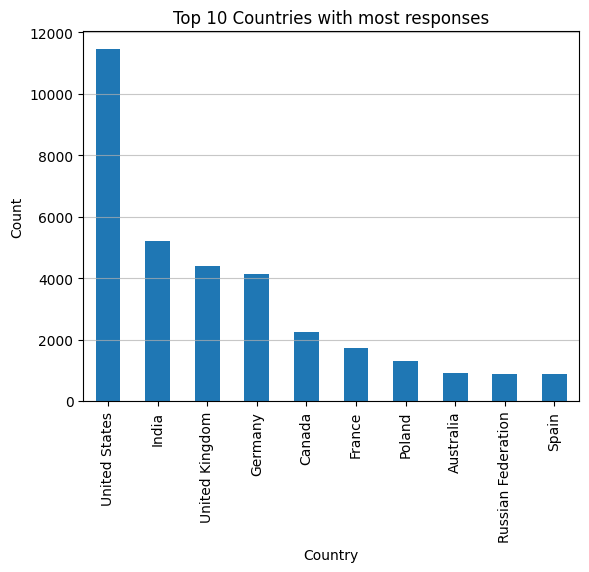

In [6]:
print(f"There are responses from {df['Country'].unique().shape[0]} countries.")

top_10_countries = df['Country'].value_counts().head(10)
top_10_countries.plot(kind='bar')

plt.title('Top 10 Countries with most responses')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

There are 36 languages taken under consideration.


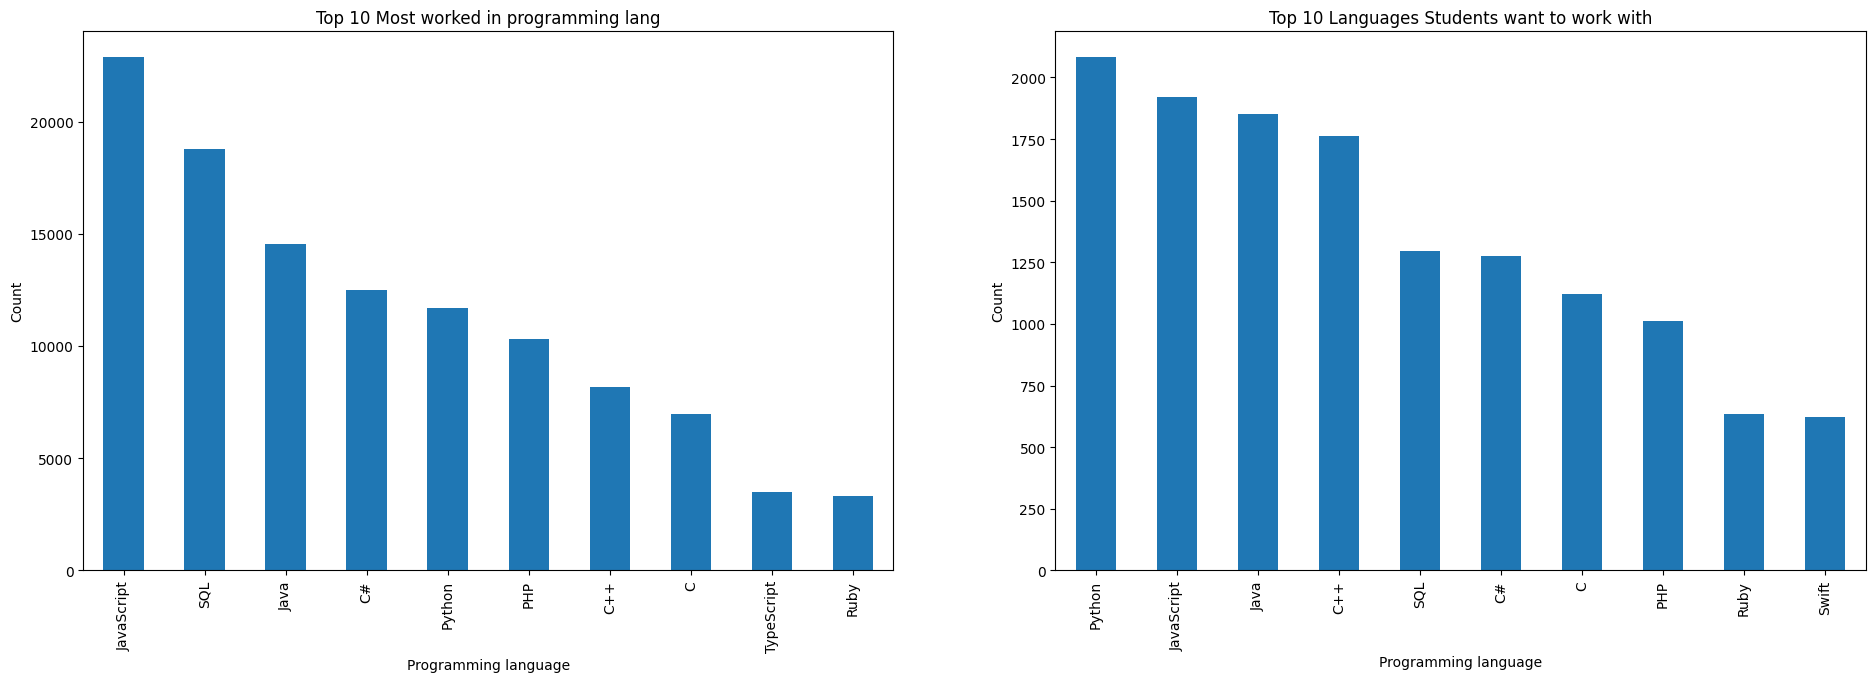

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(23, 7))

df_exploded_worked_languages = df['HaveWorkedLanguage'].str.split('; ').explode()
print(f"There are {df_exploded_worked_languages.unique().shape[0]} languages taken under consideration.")

df['WantLanguage'] = df['WantWorkLanguage'].str.split('; ')
df_exploded_want_languages = df.explode('WantLanguage')
df_exploded_want_languages = df_exploded_want_languages[df_exploded_want_languages['Professional'] == 'Student']

top_10_languages_counts = df_exploded_worked_languages.value_counts().head(10)
top_10_languages_counts.plot(kind='bar', ax=axes[0])

axes[0].set_title('Top 10 Most worked in programming lang')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Programming language')

top_10_colledge_languages_counts = df_exploded_want_languages['WantLanguage'].value_counts().head(10)
top_10_colledge_languages_counts.plot(kind='bar', ax=axes[1])

axes[1].set_title('Top 10 Languages Students want to work with')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Programming language')

plt.show()

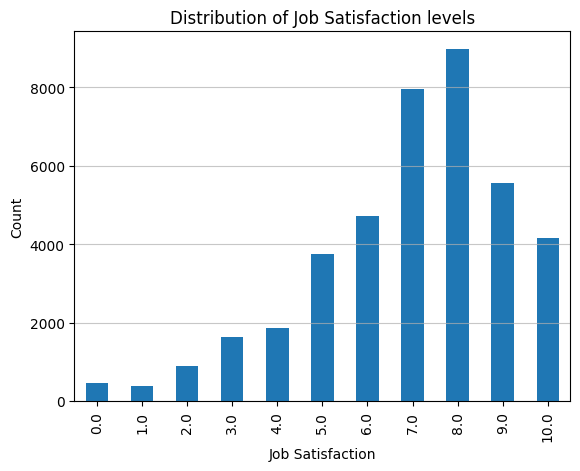

In [8]:
job_satisfaction = df['JobSatisfaction'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors='coerce'))
job_satisfaction.plot(kind='bar')

plt.title('Distribution of Job Satisfaction levels')
plt.ylabel('Count')
plt.xlabel('Job Satisfaction')

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

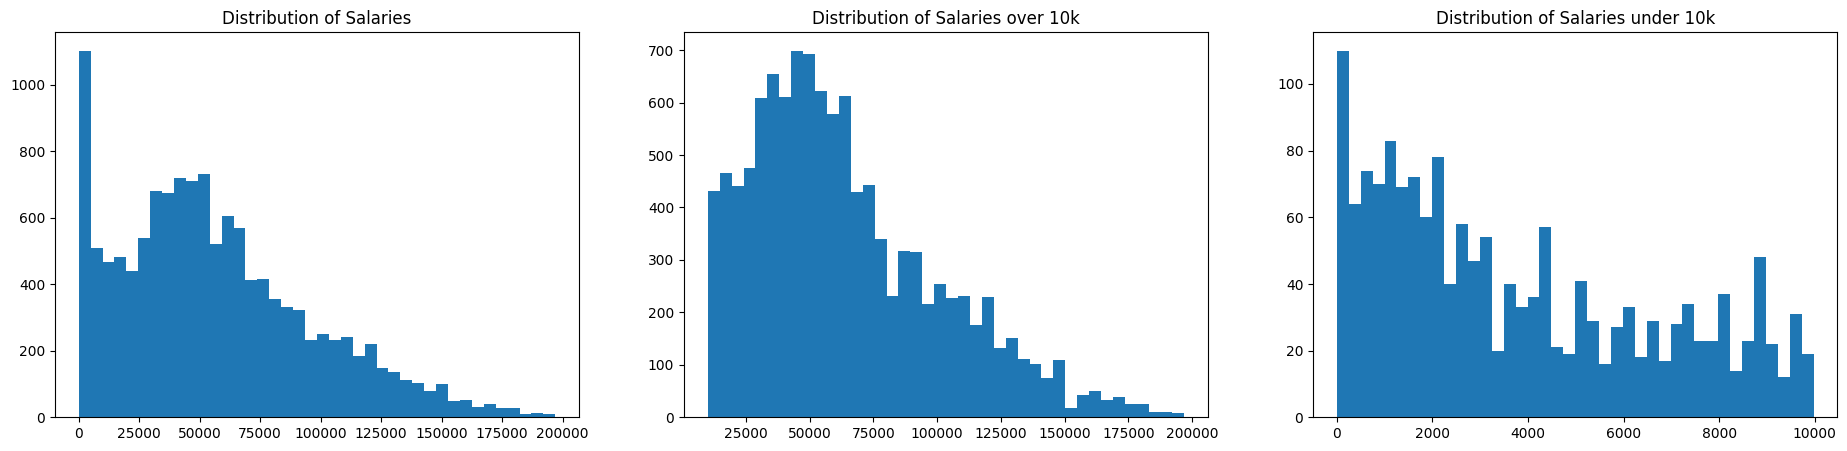

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(23, 5))

axes[0].hist(df['Salary'], bins=40)
axes[0].set_title('Distribution of Salaries')

axes[1].hist(df[df['Salary'] > 10000]['Salary'], bins=40)
axes[1].set_title('Distribution of Salaries over 10k')

axes[2].hist(df[df['Salary'] < 10000]['Salary'], bins=40)
axes[2].set_title('Distribution of Salaries under 10k')

# plt.hist(df[df['Salary'] > 10000]['Salary'], bins=40)

# plt.title('Distribution of Salary over 10k')
# plt.ylabel('Count')
# plt.xlabel('Salary')
# 
# plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

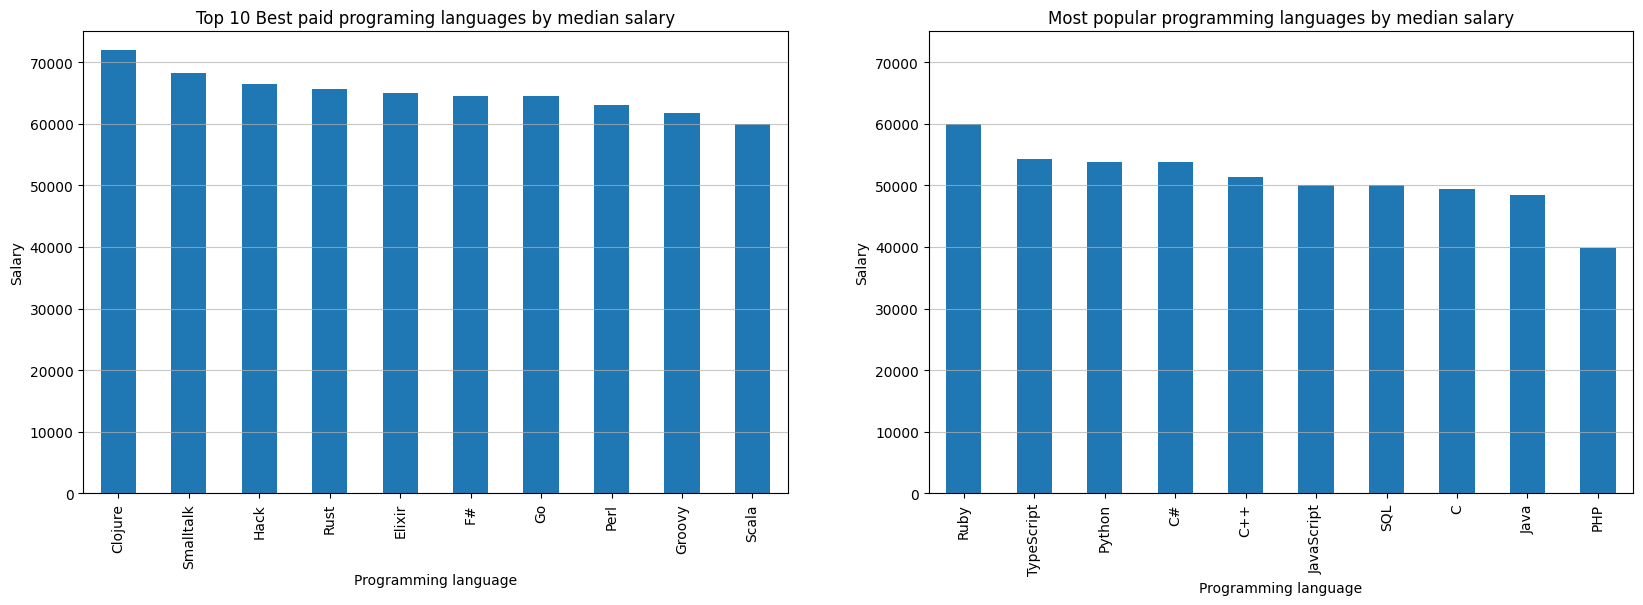

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

df['WorkedLanguages'] = df['HaveWorkedLanguage'].str.split('; ')
best_paid_lang = df.explode('WorkedLanguages').groupby('WorkedLanguages')['Salary'].median().sort_values(ascending=False)
best_paid_lang.head(10).plot(kind='bar', ax=axes[0])

axes[0].set_title('Top 10 Best paid programing languages by median salary')
axes[0].set_ylabel('Salary')
axes[0].set_ylim(0, 75000)
axes[0].set_xlabel('Programming language')
axes[0].grid(axis='y', linestyle='-', alpha=0.7)

paid_popular_languages = df.explode('WorkedLanguages')
paid_popular_languages = paid_popular_languages[paid_popular_languages['WorkedLanguages'].isin(list(top_10_languages_counts.keys()))]
paid_popular_languages = paid_popular_languages.groupby('WorkedLanguages')['Salary'].median().sort_values(ascending=False)
paid_popular_languages.plot(kind='bar', ax=axes[1])

axes[1].set_title('Most popular programming languages by median salary')
axes[1].set_ylabel('Salary')
axes[1].set_ylim(0, 75000)
axes[1].set_xlabel('Programming language')
axes[1].grid(axis='y', linestyle='-', alpha=0.7)

plt.show()